# E-commerce site clients segmentation

# Content
- [Unpickling dataframes](#Unpickling-dataframes)
- [Automatic segmentation](#Automatic-segmentation)
- [Segmentation maintenance analysis](#Segmentation-maintenance-analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

## Unpickling dataframe

After we pickled the dataframe, we have to unpickle it.

In [2]:
# To unpickle the dataframe

new_df_for_segmentation_analysis = pd.read_pickle("./pickle_data_automatic_segmentation.pkl")

rfm_new_df_for_automatic_segmentation = pd.read_pickle("./pickle_data_RFM_segmentation.pkl")

df_subset_for_purchase_dates = pd.read_pickle("./pickle_dataset_time_analysis.pkl")

## Automatic segmentation

We will perform the customers segmentation by using unsupervised Machine Learning algorithms. For this we will create a new data frame that will contain the variables that we will potentially use for this.

In [3]:
automatic_segmentation_df = new_df_for_segmentation_analysis.copy()

In [4]:
automatic_segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94228 entries, 61236 to 112911
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   product_id                          94228 non-null  object 
 1   order_id                            94228 non-null  object 
 2   review_id                           94228 non-null  object 
 3   review_score_for_a_customer_order   94228 non-null  int64  
 4   zip_code_prefix                     94228 non-null  int64  
 5   customer_geolocation_latitude       94228 non-null  float64
 6   customer_geolocation_longitude      94228 non-null  float64
 7   customer_id                         94228 non-null  object 
 8   customer_unique_id                  94228 non-null  object 
 9   customer_city                       94228 non-null  object 
 10  customer_state                      94228 non-null  object 
 11  order_purchase_timestamp            

We will eliminate information containing some identifiers such as the product and order. We will eliminate the customer_zip_code_prefix, the customer city and state. 

We will also eliminate the variables number_of_orders_for_a_customer and payment_value_for_a_customer_order because we will merge the present dataframe with the one created for the RFM analysis and we will keep the Recency, Frequency and Monetary_value features.

In [5]:
automatic_segmentation_df.columns

Index(['product_id', 'order_id', 'review_id',
       'review_score_for_a_customer_order', 'zip_code_prefix',
       'customer_geolocation_latitude', 'customer_geolocation_longitude',
       'customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'payment_type', 'payment_value_for_a_customer_order',
       'product_category_name_english', 'number_of_orders_for_a_customer',
       'number_of_items_for_a_customer', 'delay_days_purchase_delivery',
       'olist_office_customer_distance'],
      dtype='object')

In [6]:
automatic_segmentation_df = automatic_segmentation_df.drop(columns=['product_id',
                                                                    'order_id',
                                                                    'review_id',
                                                                    'zip_code_prefix', 
                                                                    'customer_geolocation_latitude', 
                                                                    'customer_geolocation_longitude',
                                                                    'customer_id', 
                                                                    'customer_city', 
                                                                    'customer_state',
                                                                    'order_purchase_timestamp', 
                                                                    'order_delivered_customer_date',
                                                                    'payment_type',
                                                                    'payment_value_for_a_customer_order',
                                                                    'product_category_name_english',
                                                                    'number_of_orders_for_a_customer'])

In [7]:
automatic_segmentation_new_df = automatic_segmentation_df.copy()

In [8]:
automatic_segmentation_new_df = pd.merge(automatic_segmentation_df, rfm_new_df_for_automatic_segmentation, on='customer_unique_id')

In [9]:
automatic_segmentation_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121072 entries, 0 to 121071
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   review_score_for_a_customer_order  121072 non-null  int64  
 1   customer_unique_id                 121072 non-null  object 
 2   number_of_items_for_a_customer     121072 non-null  int64  
 3   delay_days_purchase_delivery       121072 non-null  int64  
 4   olist_office_customer_distance     121072 non-null  float64
 5   Segment_name                       121072 non-null  object 
 6   Frequency                          121072 non-null  int64  
 7   Monetary_value                     121072 non-null  float64
 8   Recency                            121072 non-null  int64  
 9   RFM_Score                          121072 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 10.2+ MB


### Feature correlation analysis

We will calculate the pairwise correlation between columns and return a correlation matrix. We used the corr() function with the Kendall correlation coefficient, which measures the monotonic relationship between two variables. It does not require the variables to be normally distributed. (See reference https://www.learnpythonwithrune.org/pandas-correlation-methods-explained-pearson-kendall-and-spearman/).

The correlation matrix allows us to identify correlations between pairs of variables as we will see next.

* Correlation Coefficient = +1: A perfect positive relationship. 

* Correlation Coefficient >= 0.8: A fairly strong positive relationship.

* Correlation Coefficient <= -0.8: A fairly strong negative relationship.

The idea is to eliminate those variables that have more than 0.75 correlation.

In [11]:
automatic_segmentation_new_df.columns

Index(['review_score_for_a_customer_order', 'customer_unique_id',
       'number_of_items_for_a_customer', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Segment_name', 'Frequency',
       'Monetary_value', 'Recency', 'RFM_Score'],
      dtype='object')

In [12]:
columns_for_correlation_matriz = ['review_score_for_a_customer_order',
                                    'number_of_items_for_a_customer', 
                                    'delay_days_purchase_delivery',
                                    'olist_office_customer_distance', 
                                    'Frequency',
                                    'Monetary_value', 
                                    'Recency']

In [13]:
df_for_correlation_matrix = automatic_segmentation_new_df.copy()

In [14]:
df_for_correlation_matrix = df_for_correlation_matrix[columns_for_correlation_matriz]
df_for_correlation_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121072 entries, 0 to 121071
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   review_score_for_a_customer_order  121072 non-null  int64  
 1   number_of_items_for_a_customer     121072 non-null  int64  
 2   delay_days_purchase_delivery       121072 non-null  int64  
 3   olist_office_customer_distance     121072 non-null  float64
 4   Frequency                          121072 non-null  int64  
 5   Monetary_value                     121072 non-null  float64
 6   Recency                            121072 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 7.4 MB


In [15]:
correlation_matrix = df_for_correlation_matrix.corr(method='kendall')

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

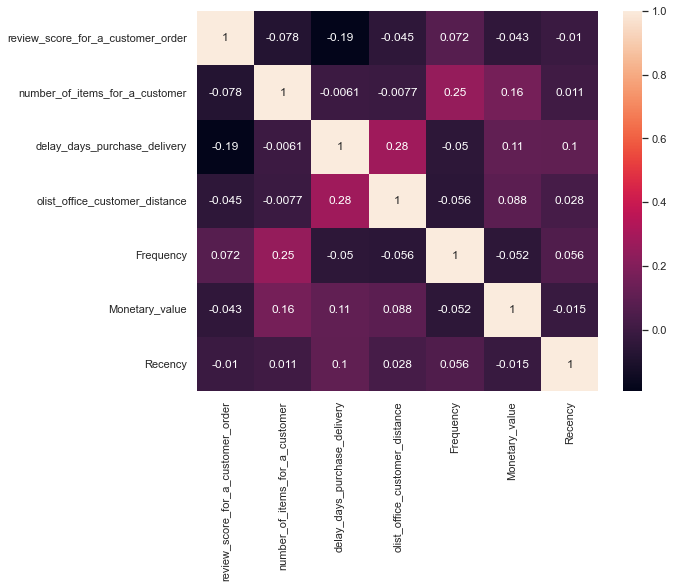

In [16]:
plt.figure(figsize=(9,7))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot=True)

### Feature transformation and standardization for outlier detection 

#### Log-transform for skewed distributions

We are going to apply a logaritmic transformation to the variables that are more asymmetrical from our data. Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution. The idea is that taking the log of the data can restore symmetry to the data.

See references: 

* https://www.sciencedirect.com/topics/computer-science/log-transformation#:~:text=Log%20transformation%20also%20de%2Demphasizes,restore%20symmetry%20to%20the%20data.&text=If%20the%20distance%20between%20each,the%20variable%20skews%20the%20distance
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

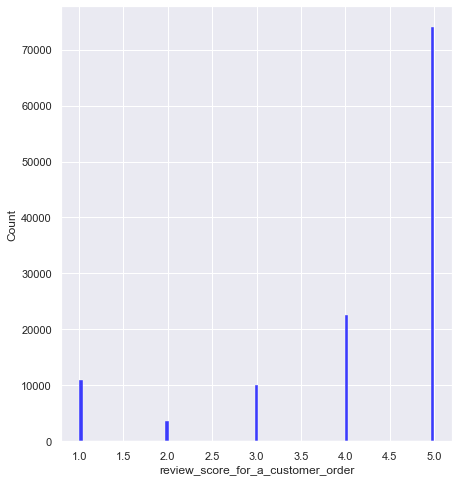

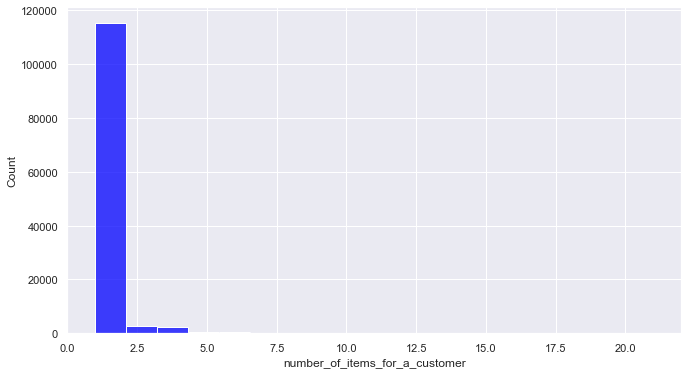

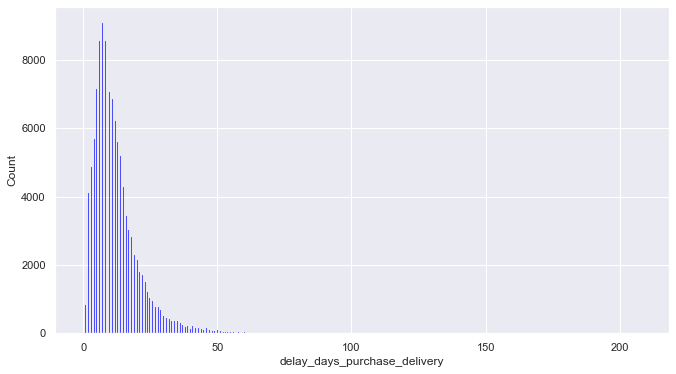

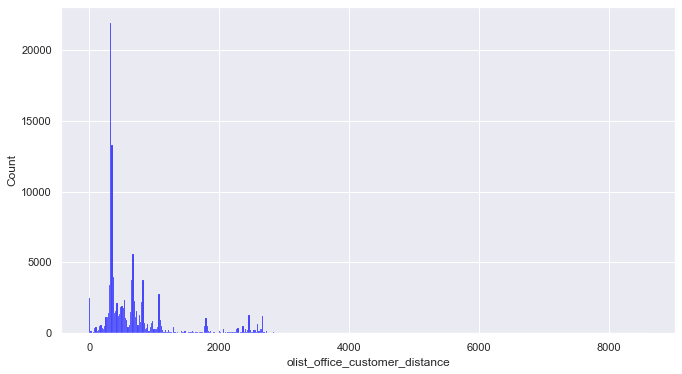

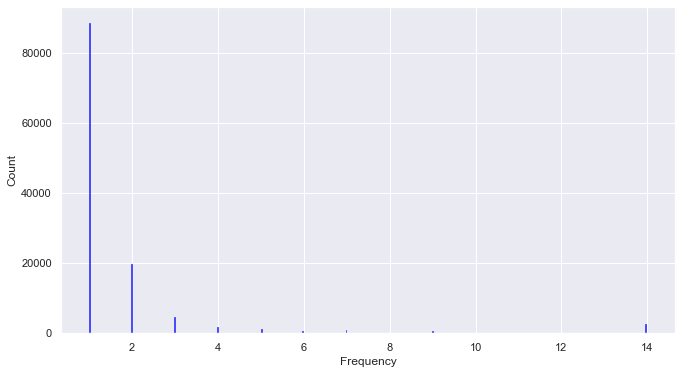

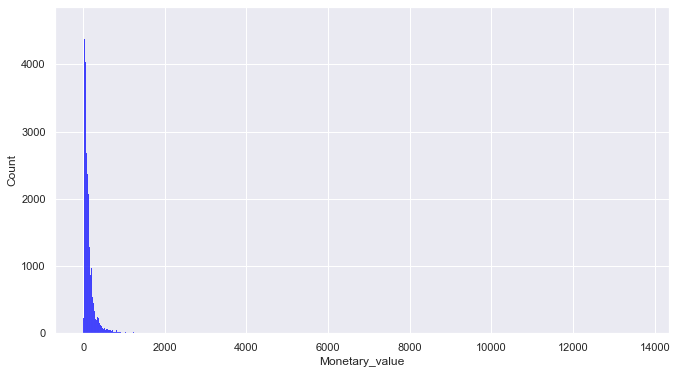

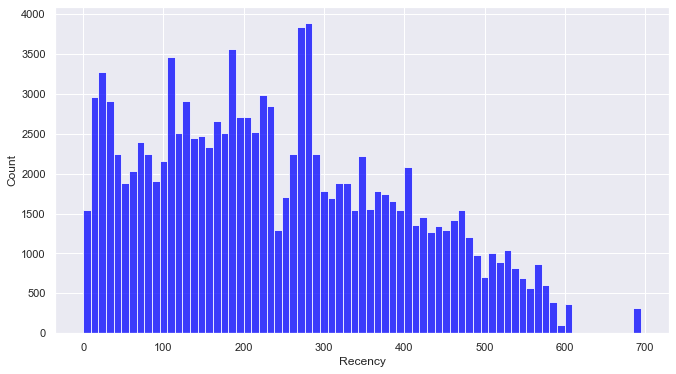

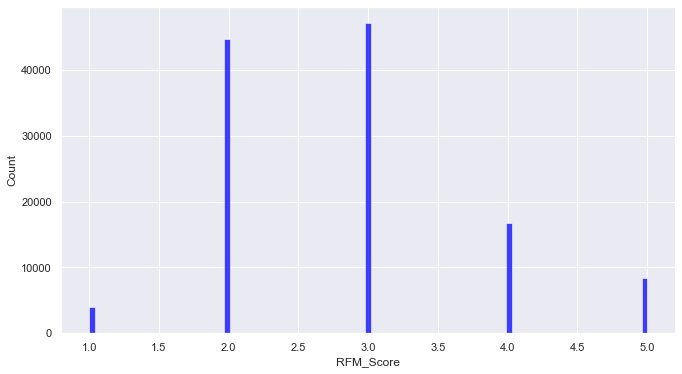

In [41]:
plt.subplots(figsize=(7, 8))

columns_histogram = automatic_segmentation_new_df.columns.tolist()
columns_histogram.remove('Segment_name')
columns_histogram.remove('customer_unique_id')
# columns_histogram.remove('RFM_Score')

for i in columns_histogram:
    sns.histplot(data = automatic_segmentation_new_df, x=i, color="blue")
    plt.show()

In [42]:
df_log_transformed = automatic_segmentation_new_df.copy()

In [43]:
columns_for_log_transformation = ['review_score_for_a_customer_order',
                                    'number_of_items_for_a_customer',
                                    'Frequency',
                                    'Monetary_value',
                                    'Recency',
                                    'delay_days_purchase_delivery',
                                    'olist_office_customer_distance']

In [44]:
for col in df_log_transformed.columns:
    if col in columns_for_log_transformation:
        df_log_transformed[col] = np.log10(df_log_transformed[col] + 0.1) 

In [45]:
# columns_histogram = df_log_transformed.columns.tolist()
# columns_histogram.remove('Segment_name')

# plt.subplots(figsize=(7, 8))
# for i in columns_histogram:
#     sns.histplot(data=df_log_transformed, x=i, color="blue")
#     plt.show()

In [46]:
df_log_transformed.describe()

review_score_for_a_customer_order  number_of_items_for_a_customer  \
count                      121072.000000                   121072.000000   
mean                            0.600369                        0.095796   
std                             0.196564                        0.139554   
min                             0.041393                        0.041393   
25%                             0.612784                        0.041393   
50%                             0.707570                        0.041393   
75%                             0.707570                        0.041393   
max                             0.707570                        1.324282   

       delay_days_purchase_delivery  olist_office_customer_distance  \
count                 121072.000000                   121072.000000   
mean                       0.991810                        2.709783   
std                        0.298866                        0.402842   
min                       -1.000000                       -0.118249   
25%                        0.785330                        2.530504   
50%                        1.004321                        2.681452   
75%                        1.178977                        2.908665   
max                        2.318272                        3.934224   

           Frequency  Monetary_value        Recency      RFM_Score  
count  121072.000000   121072.000000  121072.000000  121072.000000  
mean        0.160792        2.010776       2.252073       2.841293  
std         0.238380        0.372021       0.412931       0.944458  
min         0.041393       -1.000000      -1.000000       1.000000  
25%         0.041393        1.764176       2.075912       2.000000  
50%         0.041393        2.000434       2.354301       3.000000  
75%         0.322219        2.233250       2.550351       3.000000  
max         1.149219        4.135581       2.842047       5.000000

#### Z-scores standardization

We are going to use Z-scores to detect outliers in our data, and to standardize it. See references: 

* https://www.mygreatlearning.com/blog/outlier-analysis-explained/
* https://www.codecademy.com/article/normalization
* https://jamesmccaffrey.wordpress.com/2020/05/27/should-you-normalize-and-encode-data-before-train-test-splitting-or-after-splitting/

In [47]:
df_for_z_scores = df_log_transformed.copy()

In [48]:
columns_for_z_scores = df_for_z_scores.columns.tolist()
columns_for_z_scores.remove('Segment_name')
columns_for_z_scores.remove('customer_unique_id')
columns_for_z_scores.remove('RFM_Score')

for col in df_for_z_scores.columns:
    if col in columns_for_z_scores:
        # standardize data
        df_for_z_scores[col] = (df_for_z_scores[col] - df_for_z_scores[col].mean()) / df_for_z_scores[col].std()

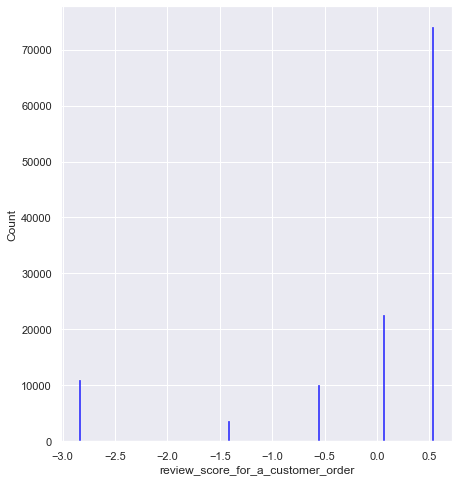

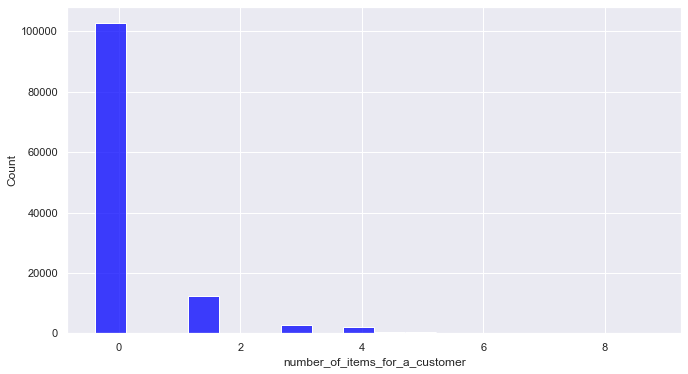

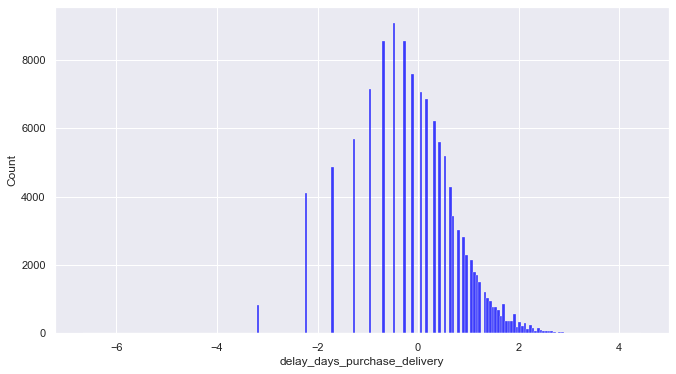

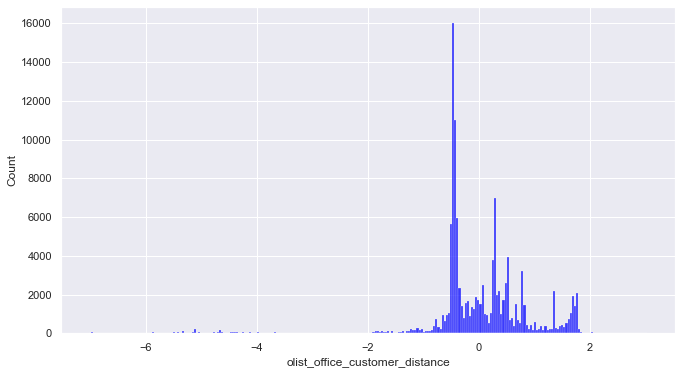

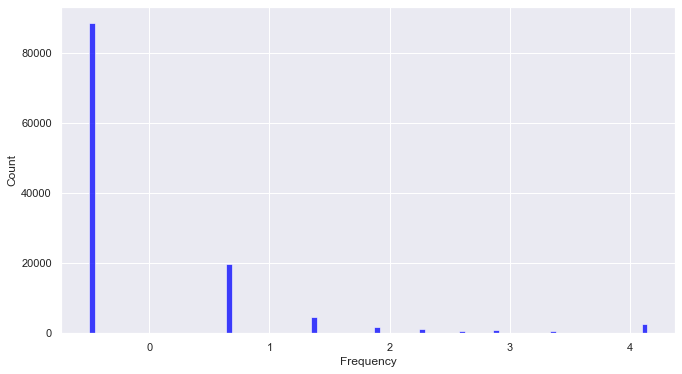

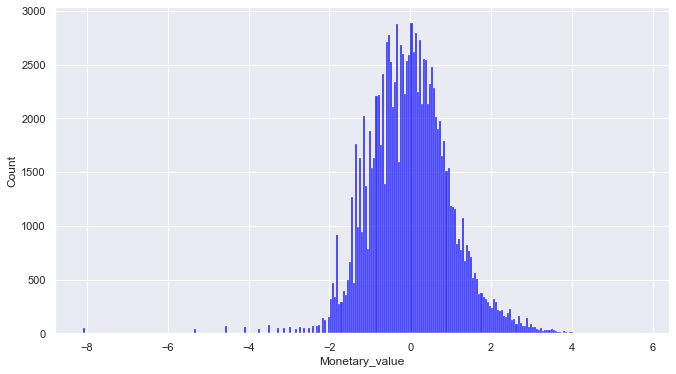

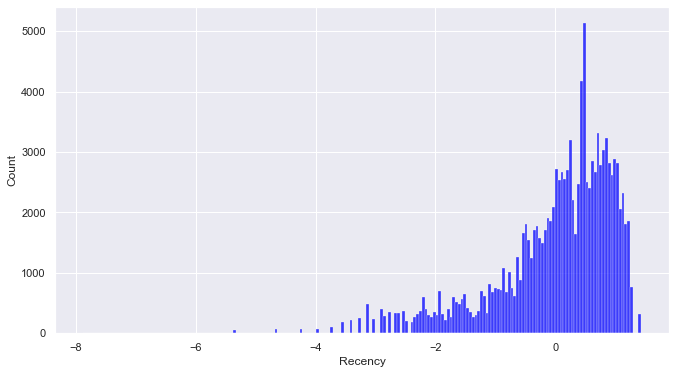

In [49]:
columns_histogram = df_for_z_scores.columns.tolist()
columns_histogram.remove('Segment_name')
columns_histogram.remove('customer_unique_id')
columns_histogram.remove('RFM_Score')

plt.subplots(figsize=(7, 8))
for i in columns_histogram:
    sns.histplot(data=df_for_z_scores, x=i, color="blue")
    plt.show()

In [50]:
df_standardized = df_for_z_scores.copy()

In [51]:
df_standardized_without_outliers = df_standardized.loc[(df_standardized['number_of_items_for_a_customer'] >= -3) & (df_standardized['number_of_items_for_a_customer'] <= 3)
                                                        & (df_standardized['Frequency'] >= -3) & (df_standardized['Frequency'] <= 3)
                                                        & (df_standardized['Monetary_value'] >= -3) & (df_standardized['Monetary_value'] <= 3)
                                                        & (df_standardized['Recency'] >= -3) & (df_standardized['Recency'] <= 3)
                                                        & (df_standardized['delay_days_purchase_delivery'] >= -3) & (df_standardized['delay_days_purchase_delivery'] <= 3)
                                                        & (df_standardized['olist_office_customer_distance'] >= -3) & (df_standardized['olist_office_customer_distance'] <= 3)]

In [52]:
# df_standardized_without_outliers = df_standardized.copy()

In [53]:
df_standardized_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109398 entries, 3033 to 121071
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   review_score_for_a_customer_order  109398 non-null  float64
 1   customer_unique_id                 109398 non-null  object 
 2   number_of_items_for_a_customer     109398 non-null  float64
 3   delay_days_purchase_delivery       109398 non-null  float64
 4   olist_office_customer_distance     109398 non-null  float64
 5   Segment_name                       109398 non-null  object 
 6   Frequency                          109398 non-null  float64
 7   Monetary_value                     109398 non-null  float64
 8   Recency                            109398 non-null  float64
 9   RFM_Score                          109398 non-null  float64
dtypes: float64(8), object(2)
memory usage: 9.2+ MB


In [54]:
# columns_histogram = df_standardized_without_outliers.columns.tolist()
# columns_histogram.remove('Customer_segment')

# plt.subplots(figsize=(7, 8))
# for i in columns_histogram:
#     sns.histplot(data=df_standardized_without_outliers, x=i, color="blue")
#     plt.show()

### PCA for dimensionality reduction

In [55]:
df_for_PCA = df_standardized_without_outliers.copy()

In [56]:
df_for_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109398 entries, 3033 to 121071
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   review_score_for_a_customer_order  109398 non-null  float64
 1   customer_unique_id                 109398 non-null  object 
 2   number_of_items_for_a_customer     109398 non-null  float64
 3   delay_days_purchase_delivery       109398 non-null  float64
 4   olist_office_customer_distance     109398 non-null  float64
 5   Segment_name                       109398 non-null  object 
 6   Frequency                          109398 non-null  float64
 7   Monetary_value                     109398 non-null  float64
 8   Recency                            109398 non-null  float64
 9   RFM_Score                          109398 non-null  float64
dtypes: float64(8), object(2)
memory usage: 9.2+ MB


In [57]:
df_for_PCA.head()

review_score_for_a_customer_order                customer_unique_id  \
3033                           0.545373  598ffe324e745b97fd07d03416c49d16   
3034                           0.063158  17e5182d5817ab03fa16ee8e960e1b87   
3035                           0.545373  acea13a79aeaf715ba68122e9deb330a   
3036                           0.545373  acea13a79aeaf715ba68122e9deb330a   
3037                           0.545373  acea13a79aeaf715ba68122e9deb330a   

      number_of_items_for_a_customer  delay_days_purchase_delivery  \
3033                        2.834506                      0.419791   
3034                        2.834506                     -0.470284   
3035                        2.834506                      0.719438   
3036                        2.834506                      0.719438   
3037                        2.834506                      0.719438   

      olist_office_customer_distance         Segment_name  Frequency  \
3033                        1.351644          Hibernating  -0.500876   
3034                        1.780848  Potential Loyalists  -0.500876   
3035                        0.075367              At Risk   0.677186   
3036                        0.075367              At Risk   0.677186   
3037                        0.075367              At Risk   0.677186   

      Monetary_value   Recency  RFM_Score  
3033        0.563391 -0.883972        2.0  
3034        2.108691  0.754427        3.0  
3035        0.809603 -2.531290        3.0  
3036        0.405598 -0.792572        3.0  
3037        0.809603 -2.531290        3.0

The following two cells are functions extracted from the Open Classrooms documentation from the course "Réalisez une analyse exploratoire de données". They are avaibale in GitHub, as indicated in their corresponding links.

The next cell contains a function that draws the correlation circles. The following correlation circles visualize the correlation between the first four principal components and the original dataset features. In such correlations  are shown via coordinates.
http://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/ 

In [58]:
# Extracted from OP gitcode. See reference:
#https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/functions.py

def display_circles(components_pca, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            ax = plt.subplots(figsize=(10,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif components_pca.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(components_pca[d1,:]), max(components_pca[d1,:]), min(components_pca[d2,:]), max(components_pca[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if components_pca.shape[1] < 30 :
                plt.quiver(np.zeros(components_pca.shape[1]), np.zeros(components_pca.shape[1]),
                   components_pca[d1,:], components_pca[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in components_pca[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(components_pca[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation circle (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

The next cell contains a function that draws the projected data into the factorial planes for the first four principal components.

In [59]:
# Extracted from OP gitcode. See reference:
#https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/functions.py

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            plt.figure(figsize=(10,8))
        
            # affichage des points
            if illustrative_var is None:
                sns.scatterplot(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    sns.scatterplot(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projected data (on F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            # plt.colorbar()

In [60]:
from sklearn.decomposition import PCA
features = df_for_PCA.drop(columns=['Segment_name', 'customer_unique_id', 'RFM_Score']).columns
names = df_for_PCA.drop(columns=['Segment_name', 'customer_unique_id', 'RFM_Score']).index


# PCA
pca = PCA(n_components=7) # We start with the total number of features
pca_result = pca.fit_transform(df_for_PCA.drop(columns=['Segment_name', 'customer_unique_id', 'RFM_Score']).values)
pca_result

array([[ 0.39753661, -1.74108304,  0.64144091, ...,  1.89685688,
        -1.63756058, -1.3426919 ],
       [ 0.9616643 , -2.73919684,  0.21273412, ...,  0.34457273,
        -2.35609395, -0.51067766],
       [-0.03105384, -2.08321306,  1.88245196, ...,  2.76467348,
         0.17282326, -1.29620333],
       ...,
       [-1.37412425, -0.21576681,  0.17701629, ..., -1.80708217,
        -0.59628433,  0.55336375],
       [ 0.49344604, -0.18063953, -0.1187574 , ..., -0.91992121,
        -0.87962684,  0.65186214],
       [-0.43188466,  0.30840992, -0.64057696, ..., -0.35329282,
         0.28314521, -0.48303349]])

In [61]:
pca_result.shape

(109398, 7)

The explained_variance_ratio_ attribute of the PCA() class returns a one-dimensional numpy array which contains the values of the percentage of variance explained by each of the selected components.

https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

In [62]:
(pca.explained_variance_ratio_ * 100).round(1)

array([25.9, 17. , 16.9, 14.9, 11.5,  7. ,  6.8])

According to the previous result, the first component alone captures about 25.9% of the variability in the dataset. Then the second component alone captures about 16.9% of the variability in the dataset and so on. 

In [63]:
print("Variance explained by all 7 components = {:.2f}".format(sum(pca.explained_variance_ratio_ * 100)))

Variance explained by all 7 components = 100.00


Text(0, 0.5, 'Cumulative Explained Variance')

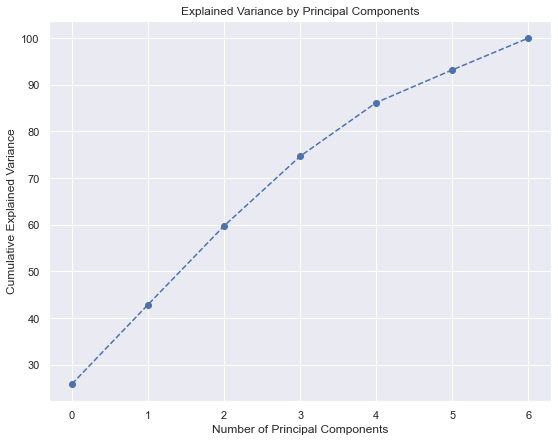

In [64]:
plt.subplots(figsize=(9, 7))
plt.plot(range(0,7),(pca.explained_variance_ratio_*100).cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80% of the variance. So, in this instance, we decide to keep 3 components.

##### Correlation circles visualization

By executing the function display_circles() we obtain the correlation circles.

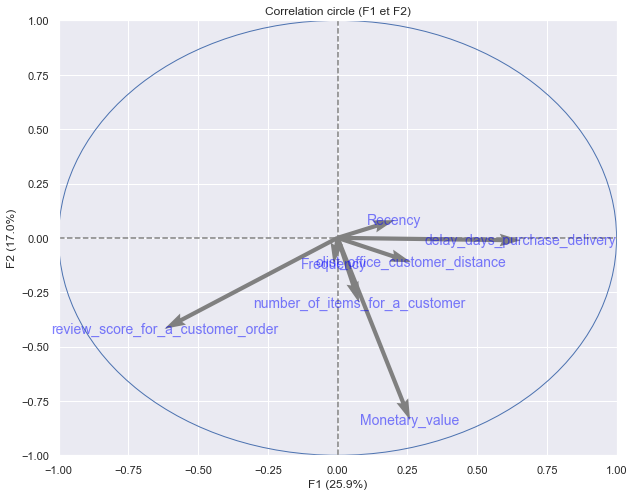

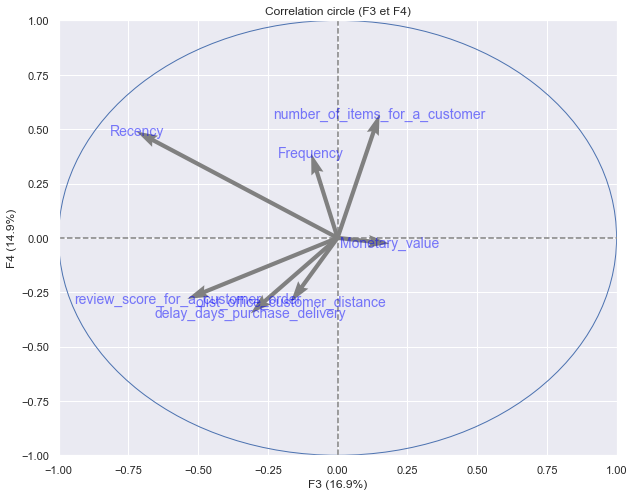

In [65]:
# Code extracted from OP example
# Cercle des corrélations
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
components_pca = pca.components_
display_circles(components_pca, 7, pca, [(0,1),(2,3)], labels = np.array(features))

##### Projected data visualization

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


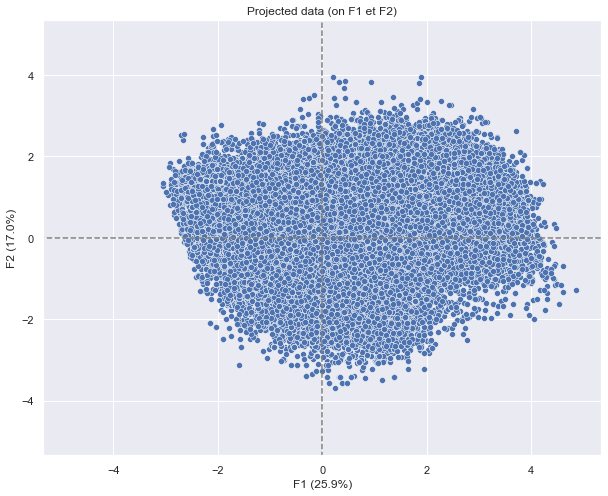

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


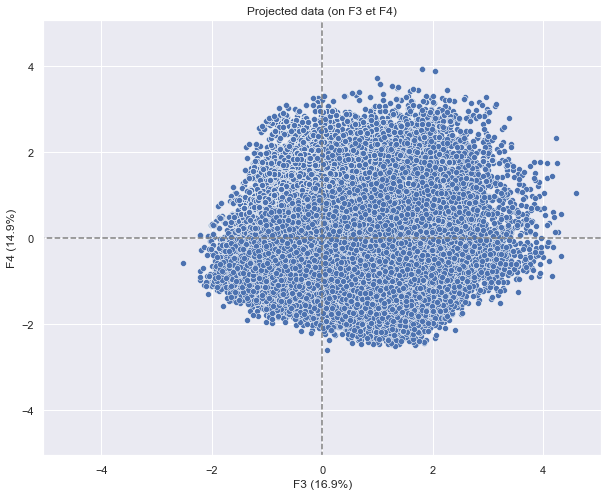

In [66]:
# Code extracted from OP example
# Projection des individus
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
X_projected = pca_result
display_factorial_planes(X_projected, 7, pca, [(0,1),(2,3)])

##### Projected data visualization by customer segment name

For a better visualization we are going to add some colors by label to the prjected data on the principal components.

In [67]:
df_for_PCA['F1'] = pca_result[:,0]
df_for_PCA['F2'] = pca_result[:,1]
df_for_PCA['F3'] = pca_result[:,2]
df_for_PCA['F4'] = pca_result[:,3]

In [68]:
df_for_PCA.head()

review_score_for_a_customer_order                customer_unique_id  \
3033                           0.545373  598ffe324e745b97fd07d03416c49d16   
3034                           0.063158  17e5182d5817ab03fa16ee8e960e1b87   
3035                           0.545373  acea13a79aeaf715ba68122e9deb330a   
3036                           0.545373  acea13a79aeaf715ba68122e9deb330a   
3037                           0.545373  acea13a79aeaf715ba68122e9deb330a   

      number_of_items_for_a_customer  delay_days_purchase_delivery  \
3033                        2.834506                      0.419791   
3034                        2.834506                     -0.470284   
3035                        2.834506                      0.719438   
3036                        2.834506                      0.719438   
3037                        2.834506                      0.719438   

      olist_office_customer_distance         Segment_name  Frequency  \
3033                        1.351644          Hibernating  -0.500876   
3034                        1.780848  Potential Loyalists  -0.500876   
3035                        0.075367              At Risk   0.677186   
3036                        0.075367              At Risk   0.677186   
3037                        0.075367              At Risk   0.677186   

      Monetary_value   Recency  RFM_Score        F1        F2        F3  \
3033        0.563391 -0.883972        2.0  0.397537 -1.741083  0.641441   
3034        2.108691  0.754427        3.0  0.961664 -2.739197  0.212734   
3035        0.809603 -2.531290        3.0 -0.031054 -2.083213  1.882452   
3036        0.405598 -0.792572        3.0  0.218673 -1.603210  0.554808   
3037        0.809603 -2.531290        3.0 -0.031054 -2.083213  1.882452   

            F4  
3033  0.412059  
3034  1.491363  
3035  0.327357  
3036  1.188699  
3037  0.327357

Text(0.5, 1.0, 'PCA analysis')

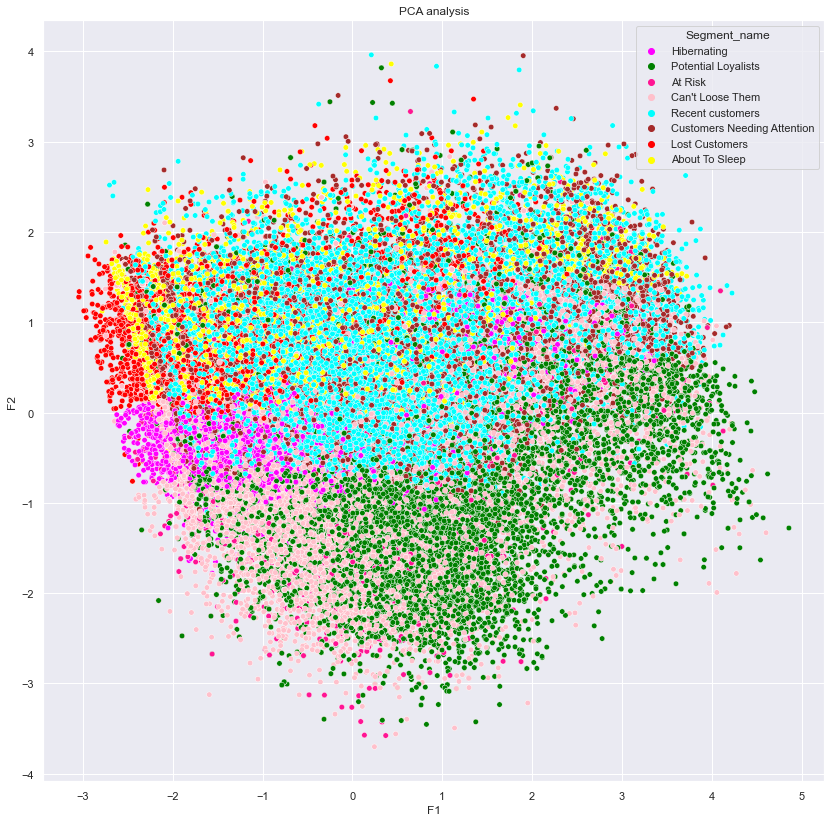

In [69]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x="F1", y="F2", hue="Segment_name", data=df_for_PCA, palette=my_pal, s=30)
plt.title('PCA analysis')

Text(0.5, 1.0, 'PCA analysis')

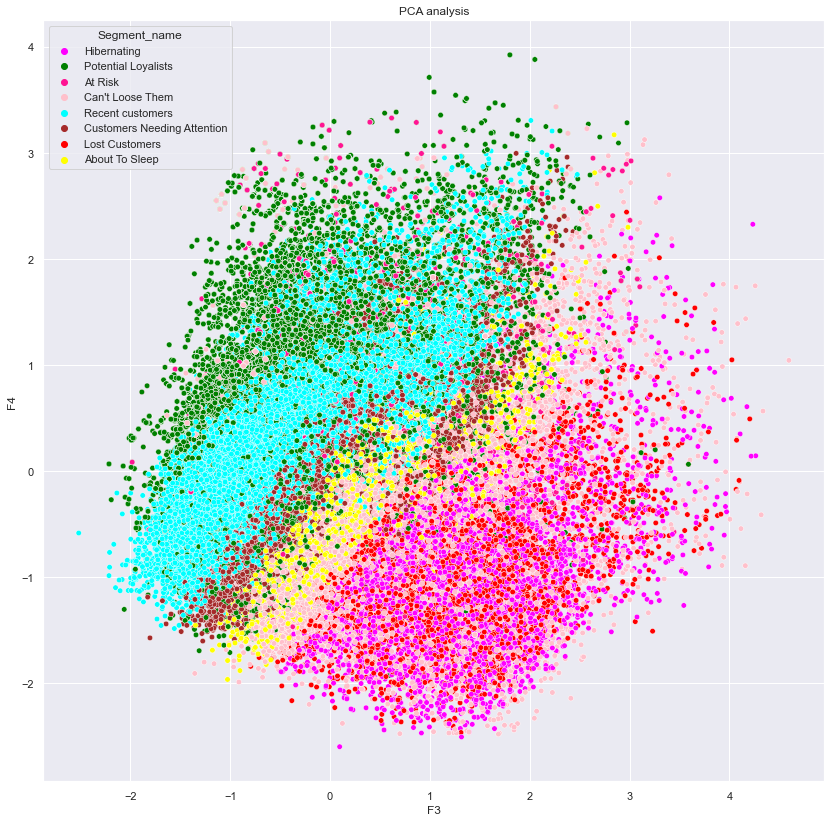

In [70]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}
sns.scatterplot(x="F3", y="F4", hue="Segment_name", data=df_for_PCA, palette=my_pal, s=30)
plt.title('PCA analysis')

### K-means clusterization

We will start by importing the necessary modules for K-means clusterization. 

In [71]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

We will produce a new dataframe which we will use for K-means analysis.

In [100]:
df_k_means_reduced_PCA = df_for_PCA.copy()

In [101]:
df_k_means_reduced_PCA.columns

Index(['review_score_for_a_customer_order', 'customer_unique_id',
       'number_of_items_for_a_customer', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Segment_name', 'Frequency',
       'Monetary_value', 'Recency', 'RFM_Score', 'F1', 'F2', 'F3', 'F4'],
      dtype='object')

We need to find the best parameters for the K-means clusterer, and the way to go is using either the silhouette method or the elbow method. We will test the elbow method.

#### Elbow method: determining the best K number of clusters

The elbow method runs K-means clustering on the dataset for a range of values of K. It performs K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points. Then the idea is to plot these points corresponding to the number of the K cluster. Then we need to find the point where the average distance from the centroid falls suddenly (Elbow-shaped).

See reference: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=Silhouette%20analysis,for%20each%20value%20of%20K

In [102]:
Sum_of_squared_distances_kmeans_clusterer_elbow = []
K = range(1,20) # Range of clusters to find the best fit

for k in K:
    k_means_clusterer_elbow = KMeans(n_clusters=k)
    k_means_clusterer_elbow = k_means_clusterer_elbow.fit(df_k_means_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)
    Sum_of_squared_distances_kmeans_clusterer_elbow.append(k_means_clusterer_elbow.inertia_)

For the visualization of the elbow method of our K-Means clusterer, we have:

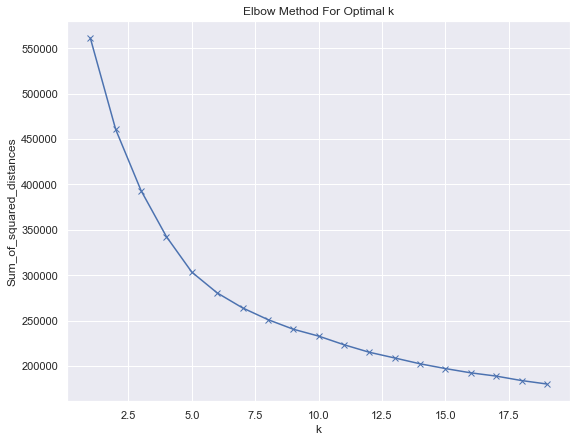

In [103]:
plt.subplots(figsize=(9, 7))
plt.plot(K, Sum_of_squared_distances_kmeans_clusterer_elbow, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As the number of clusters increases, the variance (within-cluster sum of squares) decreases. Hence there is a point when the decrease os thr sum of squared distances is not significant for increasing k-cluster value. That’s how we get the optimal value of k.

As observed, the optimal number of clusters to run the K-means algorithm from elbow method is 5 clusters.

In [104]:
clusterer_k_means_with_elbow_result = KMeans(n_clusters=5, random_state=42)

#Predict the labels of clusters
cluster_labels_with_elbow_result = clusterer_k_means_with_elbow_result.\
                                    fit_predict(df_k_means_reduced_PCA.drop(columns=['customer_unique_id', 
                                                                                        'Segment_name', 
                                                                                        'RFM_Score', 
                                                                                        'F1', 
                                                                                        'F2', 
                                                                                        'F3', 
                                                                                        'F4']).values)

In [105]:
df_k_means_reduced_PCA['Segment_k_means_label'] = cluster_labels_with_elbow_result

In [106]:
df_k_means_reduced_PCA.head()

review_score_for_a_customer_order                customer_unique_id  \
3033                           0.545373  598ffe324e745b97fd07d03416c49d16   
3034                           0.063158  17e5182d5817ab03fa16ee8e960e1b87   
3035                           0.545373  acea13a79aeaf715ba68122e9deb330a   
3036                           0.545373  acea13a79aeaf715ba68122e9deb330a   
3037                           0.545373  acea13a79aeaf715ba68122e9deb330a   

      number_of_items_for_a_customer  delay_days_purchase_delivery  \
3033                        2.834506                      0.419791   
3034                        2.834506                     -0.470284   
3035                        2.834506                      0.719438   
3036                        2.834506                      0.719438   
3037                        2.834506                      0.719438   

      olist_office_customer_distance         Segment_name  Frequency  \
3033                        1.351644          Hibernating  -0.500876   
3034                        1.780848  Potential Loyalists  -0.500876   
3035                        0.075367              At Risk   0.677186   
3036                        0.075367              At Risk   0.677186   
3037                        0.075367              At Risk   0.677186   

      Monetary_value   Recency  RFM_Score        F1        F2        F3  \
3033        0.563391 -0.883972        2.0  0.397537 -1.741083  0.641441   
3034        2.108691  0.754427        3.0  0.961664 -2.739197  0.212734   
3035        0.809603 -2.531290        3.0 -0.031054 -2.083213  1.882452   
3036        0.405598 -0.792572        3.0  0.218673 -1.603210  0.554808   
3037        0.809603 -2.531290        3.0 -0.031054 -2.083213  1.882452   

            F4  Segment_k_means_label  
3033  0.412059                      3  
3034  1.491363                      3  
3035  0.327357                      3  
3036  1.188699                      3  
3037  0.327357                      3

We can get also the centroids of each cluster.

In [107]:
# Getting the Centroids of the clusters
centroids = clusterer_k_means_with_elbow_result.cluster_centers_
unique_labels = np.unique(cluster_labels_with_elbow_result)

We then visualize the clusterization from K-means, using the first four principal components obtained from the PCA analysis. 

Text(0.5, 1.0, 'Clusters by Principal Components')

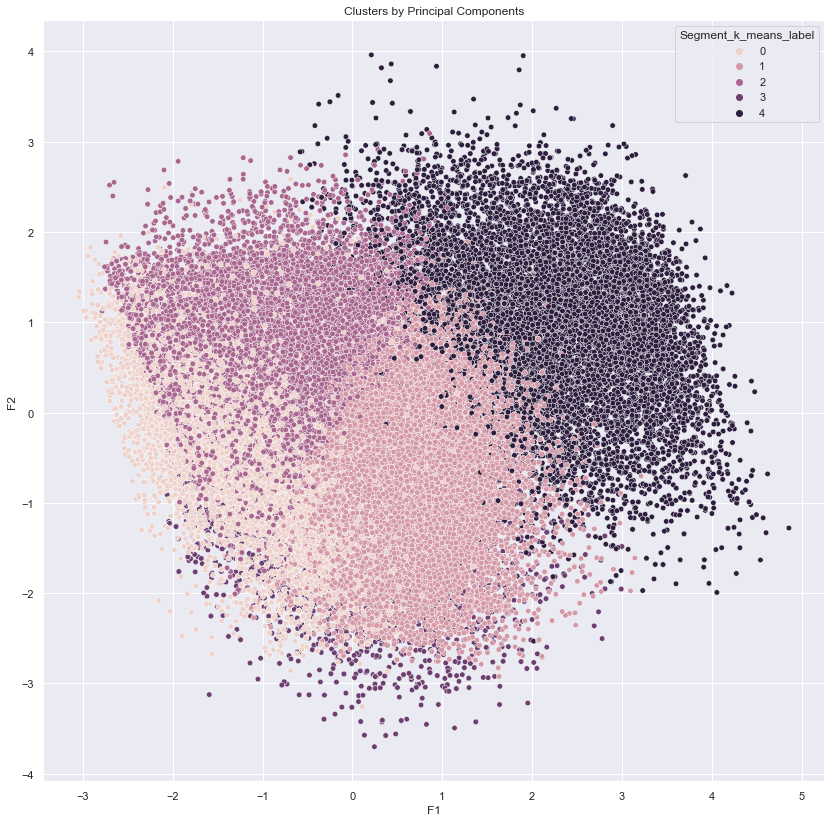

In [108]:
plt.show()
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_k_means_reduced_PCA['F1'], y = df_k_means_reduced_PCA['F2'], hue = df_k_means_reduced_PCA['Segment_k_means_label'], s = 30)
plt.title('Clusters by Principal Components')

Text(0.5, 1.0, 'Clusters by Principal Components')

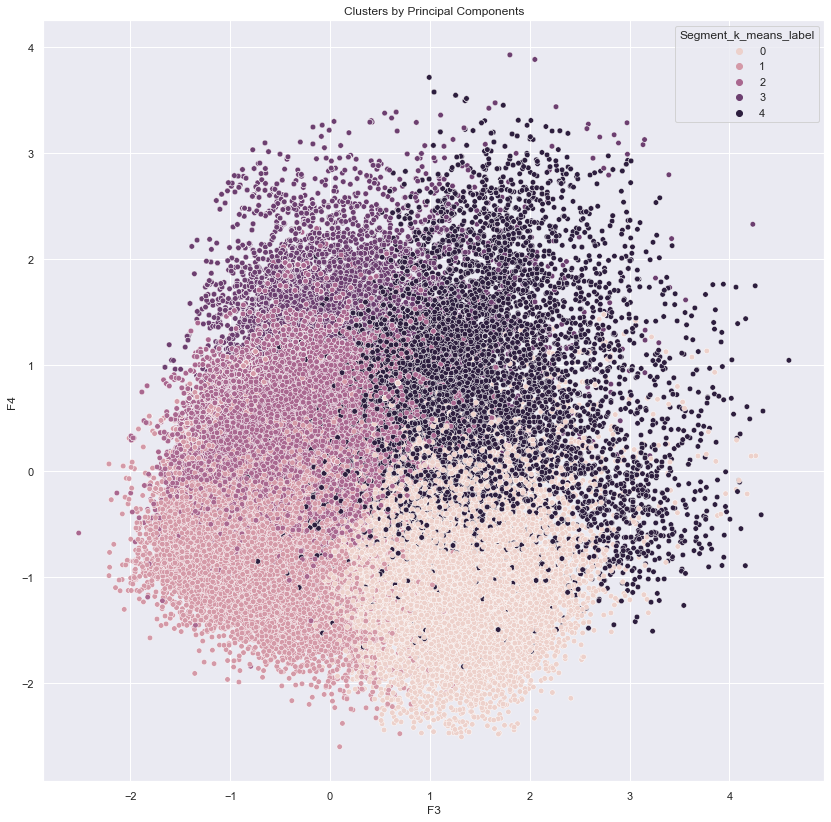

In [109]:
plt.show()
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_k_means_reduced_PCA['F3'], y = df_k_means_reduced_PCA['F4'], hue = df_k_means_reduced_PCA['Segment_k_means_label'], s = 30)
plt.title('Clusters by Principal Components')

We observed that K-means clusterer asigned five labels to the data points (each label corresponding to a cluster). Next, the idea is to give some significance to the groups formed by K-means.

#### Interpretation of automatic segmentation

We will create a dataframe that will contain the statistics for each group of labels created from K-means. For this we will perform a merge between the dataframe that we have used for the K-means clusterization and the previously obtained dataframe from RFM segmentation. We can perform this merge by customer_unique_id. 

In fact, this will be helpful to asign after the customer segment names to each label.

In [110]:
df_k_means_reduced_PCA.columns

Index(['review_score_for_a_customer_order', 'customer_unique_id',
       'number_of_items_for_a_customer', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Segment_name', 'Frequency',
       'Monetary_value', 'Recency', 'RFM_Score', 'F1', 'F2', 'F3', 'F4',
       'Segment_k_means_label'],
      dtype='object')

In [111]:
new_df_k_means_reduced_PCA = df_k_means_reduced_PCA.copy()

new_df_k_means_reduced_PCA = new_df_k_means_reduced_PCA.drop(columns=['review_score_for_a_customer_order',
                                                                      'number_of_items_for_a_customer', 
                                                                      'delay_days_purchase_delivery',
                                                                      'olist_office_customer_distance', 
                                                                      'Segment_name', 
                                                                      'RFM_Score', 
                                                                      'Frequency',
                                                                      'Monetary_value', 
                                                                      'Recency', 
                                                                      'F1', 
                                                                      'F2', 
                                                                      'F3', 
                                                                      'F4'])

df_merge_segmentation_interpretation = new_df_k_means_reduced_PCA.copy()

df_merge_segmentation_interpretation = df_merge_segmentation_interpretation.merge(automatic_segmentation_new_df, on='customer_unique_id', how='left') 

In [112]:
df_merge_segmentation_interpretation.columns

Index(['customer_unique_id', 'Segment_k_means_label',
       'review_score_for_a_customer_order', 'number_of_items_for_a_customer',
       'delay_days_purchase_delivery', 'olist_office_customer_distance',
       'Segment_name', 'Frequency', 'Monetary_value', 'Recency', 'RFM_Score'],
      dtype='object')

In [113]:
df_merge_segmentation_interpretation = df_merge_segmentation_interpretation.drop(columns=['customer_unique_id',
                                                                                           'Segment_name',
                                                                                           'RFM_Score'])
       
df_merge_segmentation_interpretation.head()

df_stats_segmentation = df_merge_segmentation_interpretation.copy()

In [114]:
df_stats_segmentation.columns

Index(['Segment_k_means_label', 'review_score_for_a_customer_order',
       'number_of_items_for_a_customer', 'delay_days_purchase_delivery',
       'olist_office_customer_distance', 'Frequency', 'Monetary_value',
       'Recency'],
      dtype='object')

In [115]:
df_stats_segmentation = df_stats_segmentation.groupby('Segment_k_means_label')[['Frequency', 
                                                                                'Monetary_value', 
                                                                                'Recency', 
                                                                                'review_score_for_a_customer_order', 
                                                                                'number_of_items_for_a_customer',
                                                                                'delay_days_purchase_delivery', 
                                                                                'olist_office_customer_distance']].agg([np.mean])

new_df_stats_segmentation = df_stats_segmentation.copy()

new_df_stats_segmentation["size"] = df_merge_segmentation_interpretation.groupby('Segment_k_means_label')[['Recency']].agg([np.size]) 

new_df_stats_segmentation.round(1).head()

Frequency Monetary_value Recency  \
                           mean           mean    mean   
Segment_k_means_label                                    
0                           2.4          167.1   111.4   
1                           2.8          167.0   295.0   
2                           3.0           98.9   289.5   
3                           5.6          140.1   268.8   
4                           3.1          170.1   256.9   

                      review_score_for_a_customer_order  \
                                                   mean   
Segment_k_means_label                                     
0                                                   4.5   
1                                                   4.4   
2                                                   4.5   
3                                                   4.8   
4                                                   2.7   

                      number_of_items_for_a_customer  \
                                                mean   
Segment_k_means_label                                  
0                                                1.0   
1                                                1.0   
2                                                1.0   
3                                                2.1   
4                                                1.4   

                      delay_days_purchase_delivery  \
                                              mean   
Segment_k_means_label                                
0                                              7.8   
1                                             16.1   
2                                              8.7   
3                                             10.6   
4                                             17.2   

                      olist_office_customer_distance    size  
                                                mean          
Segment_k_means_label                                         
0                                              559.9   50361  
1                                             1075.8  149373  
2                                              476.0  174406  
3                                              634.8  401758  
4                                              998.3   53794

In order to asign customer segment names to the labels obtained from K-means, we will connect first the detailed segmentation obtained from RFM with the main five groups obtained before from the heuristic RFM method. This is:

* **Top customer:** Potential Loyalists (2)
* **High value customer:** Customers Needing Attention (3)
* **Medium value customer:** Recent customers (1)
* **Low-value customer:** About To Sleep, Can't Loose Them (4)
* **Lost customer:** Lost Customers, Hibernating (0)

We have the behavior for each client subsegment:

* **Potential Loyalists:** Recent customers with average frequency.
* **Customers Needing Attention:** Above average recency, frequency and monetary values. May not have bought very recently though.
* **Recent Customers:** Bought most recently, but not often.
* **Can't Lose Them:** Used to purchase frequently but haven't returned for a long time.
* **About To Sleep:** Below average recency and frequency. Will lose them if not reactivated.
* **Hibernating:** Last purchase was long back and low number of orders.
* **Lost Customers:** Purchased long time ago and never came back.

We will then asign each label obtained from K-means to the five main groups obtained from the RFM heuristic method.

In [123]:
df_k_means_reduced_PCA['Segment_client_k_means'] = \
    df_k_means_reduced_PCA['Segment_k_means_label'].map({
        4: 'Low-value customer: About To Sleep, Can\'t Loose Them', # Second lowest recency.
        2: 'Top customer: Potential Loyalists', # Second highest recency.
        3: 'High value customer: Customers Needing Attention', # High recency, high frequency and high monetary value. May not have placed purchase very recently.
        1: 'Medium value customer: Recent customers', # Highest recency
        0: 'Lost customer: Lost Customers, Hibernating' # Low Recency and low monetary value
        })

We plot the data points with the corresponding customer segment names.

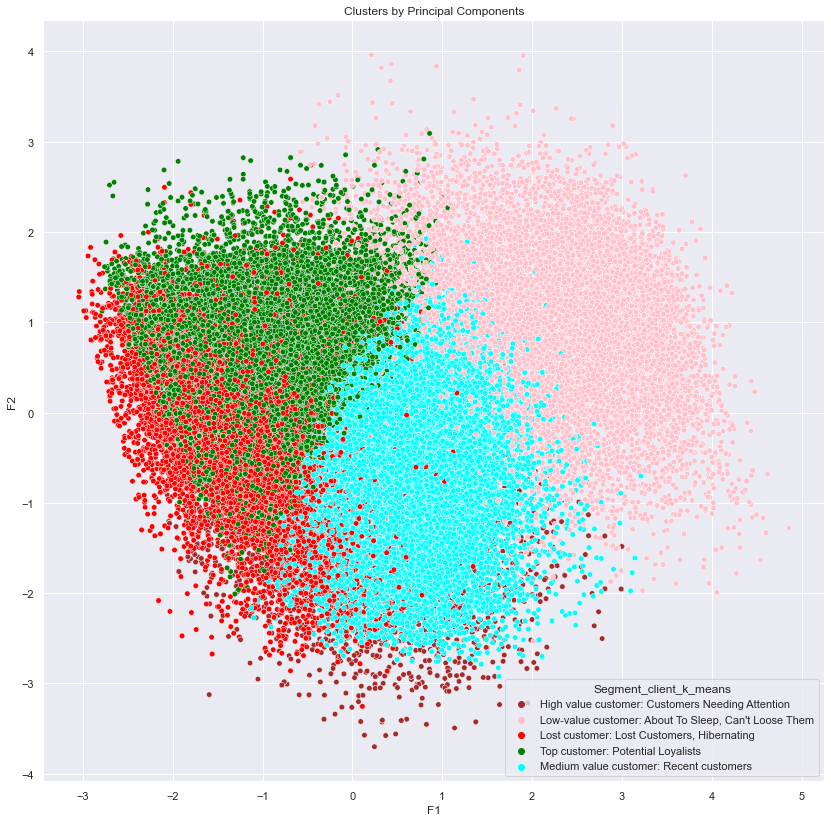

In [341]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost customer: Lost Customers, Hibernating":"red",
           "Low-value customer: About To Sleep, Can\'t Loose Them":"pink",
           "High value customer: Customers Needing Attention":"brown",
           "Medium value customer: Recent customers":"cyan",
           "Top customer: Potential Loyalists":"green"}
sns.scatterplot(x = df_k_means_reduced_PCA['F1'], y = df_k_means_reduced_PCA['F2'], hue = df_k_means_reduced_PCA['Segment_client_k_means'], palette=my_pal, s = 30)
plt.title('Clusters by Principal Components')
plt.show()

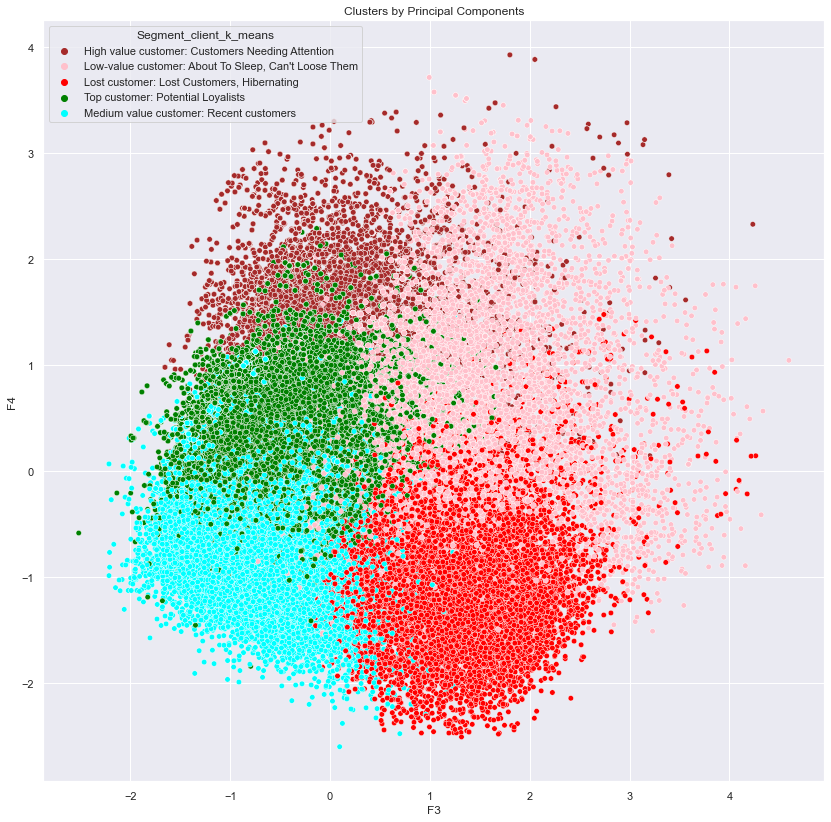

In [365]:
plt.subplots(figsize=(14, 14))
my_pal = {"Lost customer: Lost Customers, Hibernating":"red",
           "Low-value customer: About To Sleep, Can\'t Loose Them":"pink",
           "High value customer: Customers Needing Attention":"brown",
           "Medium value customer: Recent customers":"cyan",
           "Top customer: Potential Loyalists":"green"}
sns.scatterplot(x = df_k_means_reduced_PCA['F3'], y = df_k_means_reduced_PCA['F4'], hue = df_k_means_reduced_PCA['Segment_client_k_means'], palette=my_pal, s = 30)
plt.title('Clusters by Principal Components')
plt.show()

We will now add three more columns corresponding to the customer segments (and subsegments for a better understanding o their behavior) and a description. We keep the following order.

* **Top customer:** Potential Loyalists (2) **-->** 'Recent customers with average frequency.'
* **High value customer:** Customers Needing Attention (3) **-->** 'Above average recency, frequency and monetary values. May not have bought very recently though.'
* **Medium value customer:** Recent customers (1) **-->** 'Highest recency: bought most recently, but not often.'
* **Low-value customer:** About To Sleep, Can't Loose Them (4) **-->** 'Used to purchase frequently but haven't returned for a long time. Will lose them if not reactivated.'
* **Lost customer:** Lost Customers, Hibernating (0) **-->** 'Lowest recency and lowest frequency: purchased long time ago and never came back. Also low number of orders.'

In [126]:
new_df_stats_segmentation['Client_segment'] = ['Lost customer', # (0) Lowest recency and lowest frequency: purchased long time ago and never came back. Also low number of orders.
                                                'Medium value customer', # (1) Highest recency: bought most recently, but not often.
                                                'Top customer', # (2) Recent customers with average frequency.
                                                'High value customer', # (3) Above average recency, frequency and monetary values. May not have bought very recently though.
                                                'Low-value customer' # (4) Used to purchase frequently but haven't returned for a long time. Will lose them if not reactivated.
                                                ]
                                                
new_df_stats_segmentation['Client_subsegment'] = ['Lost Customers, Hibernating', # (0) Lowest recency and lowest frequency: purchased long time ago and never came back. Also low number of orders.
                                                    'Recent customers', # (1) Highest recency: bought most recently, but not often.
                                                    'Potential Loyalists', # (2) Recent customers with average frequency.
                                                    'Customers Needing Attention', # (3) Above average recency, frequency and monetary values. May not have bought very recently though.
                                                    'About To Sleep, Can\'t Loose Them' # (4) Used to purchase frequently but haven\'t returned for a long time. Will lose them if not reactivated.
                                                    ]
                                                
new_df_stats_segmentation['Description'] = ['Purchased long time ago and never came back. Also low number of orders.', # (0) 'Lost customer'
                                            'Highest recency: bought most recently, but not often.', # (1) 'Medium value customer'
                                            'Recent customers with average frequency.', # (2) 'Top customer'
                                            'Above average recency, frequency and monetary values. May not have bought very recently.', # (3) 'High value customer'
                                            'Used to purchase frequently but haven\'t returned for a long time. Will lose them if not reactivated.' # (4) 'Low-value customer'
                                            ]

In [127]:
new_df_stats_segmentation.round(0).drop(columns=['review_score_for_a_customer_order',
                                                    'number_of_items_for_a_customer',
                                                    'delay_days_purchase_delivery',
                                                    'olist_office_customer_distance']).head()

Frequency Monetary_value Recency    size  \
                           mean           mean    mean           
Segment_k_means_label                                            
0                           2.0          167.0   111.0   50361   
1                           3.0          167.0   295.0  149373   
2                           3.0           99.0   289.0  174406   
3                           6.0          140.0   269.0  401758   
4                           3.0          170.0   257.0   53794   

                              Client_segment  \
                                               
Segment_k_means_label                          
0                              Lost customer   
1                      Medium value customer   
2                               Top customer   
3                        High value customer   
4                         Low-value customer   

                                      Client_subsegment  \
                                                          
Segment_k_means_label                                     
0                           Lost Customers, Hibernating   
1                                      Recent customers   
2                                   Potential Loyalists   
3                           Customers Needing Attention   
4                      About To Sleep, Can't Loose Them   

                                                             Description  
                                                                          
Segment_k_means_label                                                     
0                      Purchased long time ago and never came back. A...  
1                      Highest recency: bought most recently, but not...  
2                               Recent customers with average frequency.  
3                      Above average recency, frequency and monetary ...  
4                      Used to purchase frequently but haven't return...

In [128]:
new_df_stats_segmentation.round(0).drop(columns=['Client_subsegment',
                                                    'Description']).head()

Frequency Monetary_value Recency  \
                           mean           mean    mean   
Segment_k_means_label                                    
0                           2.0          167.0   111.0   
1                           3.0          167.0   295.0   
2                           3.0           99.0   289.0   
3                           6.0          140.0   269.0   
4                           3.0          170.0   257.0   

                      review_score_for_a_customer_order  \
                                                   mean   
Segment_k_means_label                                     
0                                                   5.0   
1                                                   4.0   
2                                                   5.0   
3                                                   5.0   
4                                                   3.0   

                      number_of_items_for_a_customer  \
                                                mean   
Segment_k_means_label                                  
0                                                1.0   
1                                                1.0   
2                                                1.0   
3                                                2.0   
4                                                1.0   

                      delay_days_purchase_delivery  \
                                              mean   
Segment_k_means_label                                
0                                              8.0   
1                                             16.0   
2                                              9.0   
3                                             11.0   
4                                             17.0   

                      olist_office_customer_distance    size  \
                                                mean           
Segment_k_means_label                                          
0                                              560.0   50361   
1                                             1076.0  149373   
2                                              476.0  174406   
3                                              635.0  401758   
4                                              998.0   53794   

                              Client_segment  
                                              
Segment_k_means_label                         
0                              Lost customer  
1                      Medium value customer  
2                               Top customer  
3                        High value customer  
4                         Low-value customer

In [129]:
new_df_stats_segmentation.describe()

Frequency Monetary_value     Recency review_score_for_a_customer_order  \
           mean           mean        mean                              mean   
count  5.000000       5.000000    5.000000                          5.000000   
mean   3.404290     148.632240  244.314050                          4.186744   
std    1.275713      30.369872   75.862656                          0.836627   
min    2.411807      98.873554  111.445245                          2.704744   
25%    2.820918     140.068788  256.852270                          4.445047   
50%    3.027453     166.992636  268.772818                          4.514008   
75%    3.128453     167.116042  289.483194                          4.516987   
max    5.632819     170.110180  295.016723                          4.752933   

      number_of_items_for_a_customer delay_days_purchase_delivery  \
                                mean                         mean   
count                       5.000000                     5.000000   
mean                        1.311233                    12.104421   
std                         0.476487                     4.318438   
min                         1.000208                     7.840809   
25%                         1.000464                     8.703944   
50%                         1.046921                    10.603672   
75%                         1.399041                    16.137019   
max                         2.109529                    17.236662   

      olist_office_customer_distance           size  
                                mean                 
count                       5.000000       5.000000  
mean                      748.957810  165938.400000  
std                       270.317158  143083.453195  
min                       475.997664   50361.000000  
25%                       559.854448   53794.000000  
50%                       634.831727  149373.000000  
75%                       998.347611  174406.000000  
max                      1075.757603  401758.000000

### DBSCAN clusterization

We will now test the DBSCAN algorithm. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised machine learning technique used to identify clusters of varying shape in a dataset.

The advantages of DBSCAN over other clustering algorithms are:

* DBSCAN does not require a pre-determined set number of clusters.
* DBSCAN identifies outliers as noise, instead of classifying them into a cluster.
* DBSCAN is more flexible when it comes to the size and shape of clusters than other partitioning methods, such as K-means. It is able to identify clusters that differ in size and shape from one another, which makes it more useful for messy data.

See reference:

https://medium.com/@tarammullin/dbscan-2788cfce9389

In [130]:
from sklearn.cluster import DBSCAN

#### DBSCAN without outliers

We will create a dataframe that we can manipulate after for DBSCAN analysis.

In [421]:
df_dbscan_reduced_PCA = df_for_PCA.copy()

In [422]:
# df_dbscan_reduced_PCA = df_dbscan_reduced_PCA[:40000]

df_dbscan_reduced_PCA = df_dbscan_reduced_PCA.sample(frac=0.3, replace=True)

In [423]:
df_dbscan_reduced_PCA.shape

(32819, 14)

#### DBSCAN Parameter Estimation:

https://medium.com/@tarammullin/dbscan-2788cfce9389

DBSCAN’s two parameters are: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

* Minimum samples ('min_samples'): the fewest number of points required to form a cluster. min_samples value should be set using domain knowledge and familiarity with the dataset. The larger the dataset, the larger the value of min_samples should be. If the data set is noisier, we need to choose a larger value of min_samples. Generally, min_samples should be greater than or equal to the dimensionality of the data set. For 2-dimensional data, we should use DBSCAN’s default value of min_samples = 4. If the data has more than 2 dimensions, we should choose min_samples = 2*dim, where dim = the_dimensions_of_dataset. In our case, we have 7 features, which means min_samples = 14.

* ε (epsilon or 'eps'): the maximum distance two points can be from one another while still belonging to the same cluster. To determine eps parameter we can use NearestNeighbors from Scikit-learn, to calculate the average distance between each point and its n_neighbors. This technique calculates the average distance between each point and its k nearest neighbors. The average k-distances are then plotted in ascending order on a k-distance graph. We will find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

See also reference: https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan#:~:text=Sort%20the%20distances%20in%20the,'elbow'%20as%20optimal%20eps.

In [424]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=20)

neighbors_fit = neighbors.fit(df_dbscan_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)

distances, indices = neighbors_fit.kneighbors(df_dbscan_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)

(pca.explained_variance_ratio_ * 100).round(1)

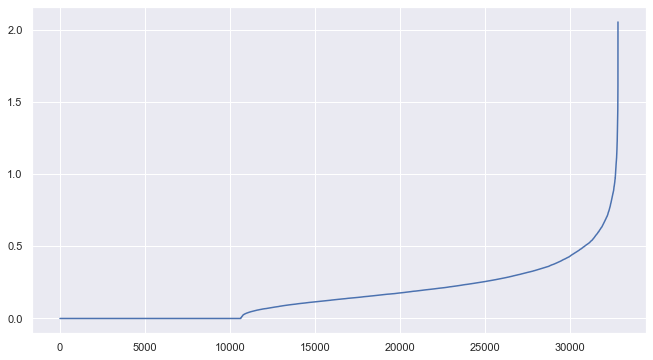

In [425]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [433]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

# We can try with 0.8, 1, 1.5, where some clusters where observed. min_samples => 14. min_samples = 20 worked fine

dbscan_clusterer = DBSCAN(eps = 1, min_samples = 80).fit(df_dbscan_reduced_PCA.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)
labels_db_scan = dbscan_clusterer.labels_

We will now visualize the clusterization from DBSCAN algorithm using the four two principal components obtained from PCA analysis.

In [434]:
df_dbscan_reduced_PCA['Segment_dbscan_label'] = labels_db_scan

In [435]:
df_dbscan_reduced_PCA.head()

review_score_for_a_customer_order                customer_unique_id  \
42424                           -0.554565  cf5a0cca7586a6ac2bd76b33a0cc76ff   
109201                           0.063158  5889e66d7e94fef6d0ce72f974730e94   
106053                           0.545373  4f6eb3ed7e15c93c03dd46af4299801c   
90336                            0.545373  f0ac405c280fab1d087b8982e7801b54   
15549                            0.545373  5b8a75e77489899ad9e6d57273aafd7f   

        number_of_items_for_a_customer  delay_days_purchase_delivery  \
42424                        -0.389835                      0.889591   
109201                       -0.389835                      1.244042   
106053                       -0.389835                     -0.278804   
90336                        -0.389835                     -1.674491   
15549                         1.622483                     -0.278804   

        olist_office_customer_distance         Segment_name  Frequency  \
42424                        -0.419044     Can't Loose Them  -0.500876   
109201                       -1.692474       Lost Customers  -0.500876   
106053                       -1.211866  Potential Loyalists  -0.500876   
90336                        -0.377904  Potential Loyalists   0.677186   
15549                        -0.521983  Potential Loyalists   0.677186   

        Monetary_value   Recency  RFM_Score        F1        F2        F3  \
42424         1.082441 -2.107027        2.0  0.558439 -0.661456  1.875567   
109201       -0.790112 -1.199807        2.0 -0.229259  0.861951  0.644381   
106053        0.820931  0.301953        2.0 -0.675774 -0.604438 -0.004734   
90336        -0.259214 -2.198143        3.0 -2.179662 -0.121435  1.779488   
15549        -0.245081  0.866071        5.0 -0.517843 -0.483499 -0.532860   

              F4  Segment_dbscan_label  
42424  -1.368708                     0  
109201 -0.797554                    -1  
106053  0.147193                     0  
90336  -0.351816                     4  
15549   1.849968                     1

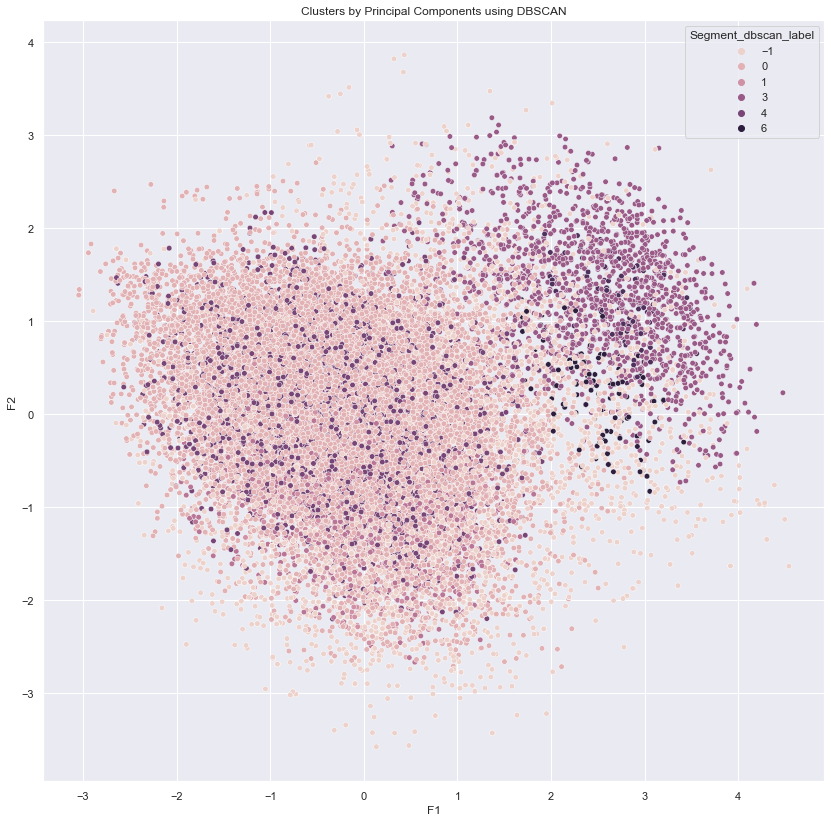

In [436]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_dbscan_reduced_PCA['F1'], y = df_dbscan_reduced_PCA['F2'], hue = df_dbscan_reduced_PCA['Segment_dbscan_label'], s = 30)
plt.title('Clusters by Principal Components using DBSCAN')
plt.show()

In [438]:
df_dbscan_reduced_PCA['Segment_dbscan_label'].unique()

array([ 0, -1,  4,  1,  2,  3,  6,  5], dtype=int64)

#### DBSCAN without outliers

In [574]:
df_dbscan_with_outliers = df_for_z_scores.copy()

In [575]:
# df_dbscan_with_outliers = df_dbscan_with_outliers[:40000]

df_dbscan_with_outliers = df_dbscan_with_outliers.sample(frac=0.3, replace=True)

df_dbscan_with_outliers.shape

(36322, 10)

In [576]:
features = df_dbscan_with_outliers.drop(columns=['Segment_name', 'customer_unique_id', 'RFM_Score']).columns
names = df_dbscan_with_outliers.drop(columns=['Segment_name', 'customer_unique_id', 'RFM_Score']).index


# PCA
pca = PCA(n_components=7) # We start with the total number of features
pca_result_with_outliers = pca.fit_transform(df_dbscan_with_outliers.drop(columns=['Segment_name', 'customer_unique_id', 'RFM_Score']).values)

df_dbscan_with_outliers['F1'] = pca_result_with_outliers[:,0]
df_dbscan_with_outliers['F2'] = pca_result_with_outliers[:,1]
df_dbscan_with_outliers['F3'] = pca_result_with_outliers[:,2]
df_dbscan_with_outliers['F4'] = pca_result_with_outliers[:,3]

print("Variance explained by all 7 components = {}".format((pca.explained_variance_ratio_ * 100).round(1)))

Variance explained by all 7 components = [23.1 18.1 15.4 13.8 12.9  8.8  7.9]


In [577]:
neighbors = NearestNeighbors(n_neighbors=50)

neighbors_fit = neighbors.fit(df_dbscan_with_outliers.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)

distances, indices = neighbors_fit.kneighbors(df_dbscan_with_outliers.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)

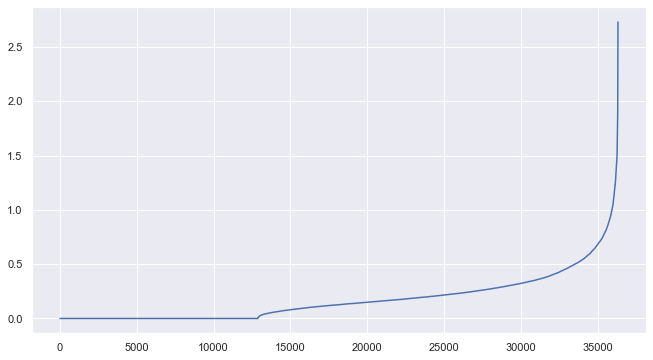

In [578]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [579]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

# We can try with 0.8, 1, 1.5, where some clusters where observed. min_samples => 14. min_samples = 20 worked fine

dbscan_clusterer = DBSCAN(eps = 2, min_samples = 80).fit(df_dbscan_with_outliers.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)
labels_db_scan = dbscan_clusterer.labels_

# y_pred = dbscan_clusterer.fit_predict(df_dbscan_with_outliers.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values)

In [580]:
df_dbscan_with_outliers['Segment_dbscan_label'] = labels_db_scan

In [581]:
df_dbscan_with_outliers.head()

review_score_for_a_customer_order                customer_unique_id  \
120652                           0.545373  6b5a339aace802fc83fb5645a7088e82   
26968                            0.545373  d197097a91ee14e6929d261e2d9b15f6   
44566                            0.545373  96cfb3cb3042dc4d0fc15e5dae7080c3   
48482                           -2.843735  59d7dd5099fcbc0a7443e069e1f158eb   
80825                            0.545373  cbc71e02efb1d43b84f80b2a64d6013c   

        number_of_items_for_a_customer  delay_days_purchase_delivery  \
120652                       -0.389835                     -0.470284   
26968                        -0.389835                     -0.278804   
44566                        -0.389835                     -0.690879   
48482                        -0.389835                     -0.470284   
80825                        -0.389835                     -1.268215   

        olist_office_customer_distance         Segment_name  Frequency  \
120652                        0.322559     Recent customers  -0.500876   
26968                         0.071092     Can't Loose Them  -0.500876   
44566                         0.515300     Can't Loose Them  -0.500876   
48482                         0.293984       About To Sleep  -0.500876   
80825                        -0.418061  Potential Loyalists   0.677186   

        Monetary_value   Recency  RFM_Score        F1        F2        F3  \
120652       -0.662866  1.131765        3.0 -0.254492 -0.729142 -0.971134   
26968         1.396564 -0.095947        2.0  0.189186 -0.231511  0.989560   
44566         0.381209 -0.548174        2.0 -0.360429 -0.502999  0.898294   
48482        -1.251190 -0.358239        2.0  0.509411 -0.652814 -0.073705   
80825         0.029102 -0.349997        3.0 -1.471287  0.230844  0.239595   

              F4  Segment_dbscan_label  
120652 -0.594200                     0  
26968  -0.771170                     0  
44566  -0.705663                     0  
48482   2.455949                     0  
80825  -0.268068                     0

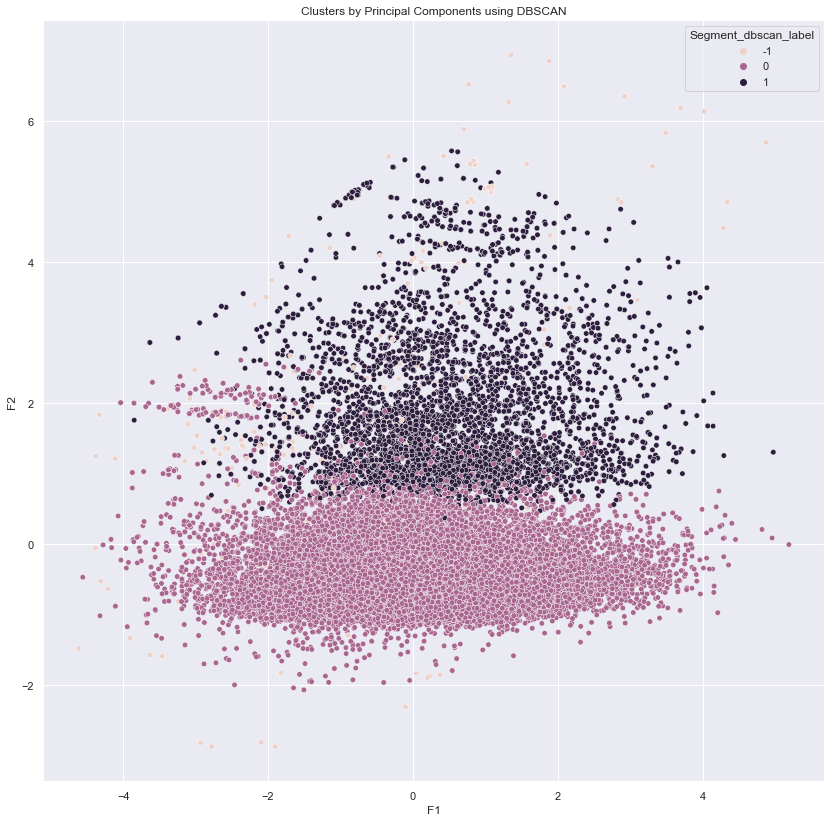

In [582]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x = df_dbscan_with_outliers['F1'], y = df_dbscan_with_outliers['F2'], hue = df_dbscan_with_outliers['Segment_dbscan_label'], s = 30)
plt.title('Clusters by Principal Components using DBSCAN')
plt.show()

In [583]:
df_dbscan_with_outliers['Segment_dbscan_label'].unique()

array([ 0,  1, -1], dtype=int64)

### T-SNE for dimensionality reduction

T-distributed Stochastic Neighbor Embedding is a non-linear dimensionality reducion technique. T-SNE models the probability distribution  of neighbors around each point.

One of the hyperparameters is the perplexity. This parameter is, in a sense, a guess about the number of close neighbors each point has. 

See reference: https://distill.pub/2016/misread-tsne/

In [140]:
from sklearn.manifold import TSNE

In [141]:
df_for_TSNE = df_for_PCA.copy()

In [142]:
df_for_TSNE.shape

(109398, 14)

In [159]:
my_pal = {"Lost Customers":"red",
           "Hibernating":"magenta",
           "About To Sleep":"yellow",
           "Can\'t Loose Them":"pink",
           "At Risk":"deeppink",
           "Customers Needing Attention":"brown",
           "Recent customers":"cyan",
           "Potential Loyalists":"green",
           "Loyal Customers":"blue"}

In [172]:
quantity = 50000
# per = pow(quantity, 0.5)

per = 50.0

tsne = TSNE(verbose=1, random_state=42, perplexity=per)
tsne_result = tsne.fit_transform(df_for_TSNE[:quantity].drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values) 

new_df_for_TSNE = pd.DataFrame()
new_df_for_TSNE["y"] = df_for_TSNE[:quantity]['Segment_name']
new_df_for_TSNE["comp-1"] = tsne_result[:,0]
new_df_for_TSNE["comp-2"] = tsne_result[:,1]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.118s...
[t-SNE] Computed neighbors for 50000 samples in 12.712s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for s

[Text(0.5, 1.0, 'Data T-SNE projection')]

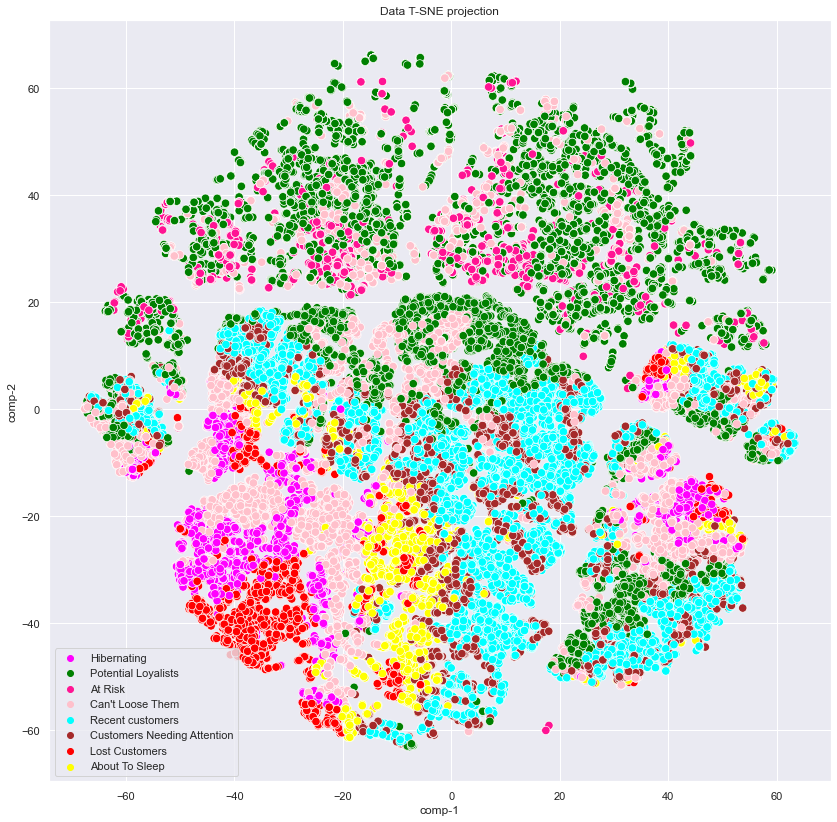

In [173]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x="comp-1", y="comp-2", hue=new_df_for_TSNE.y.tolist(), s = 70,
                palette=my_pal,
                # palette=sns.color_palette("hls", 3),
                data=new_df_for_TSNE).set(title="Data T-SNE projection")

In [174]:
# quantity = 50000
# per = pow(quantity, 0.5)

per = 50.0

tsne = TSNE(verbose=1, random_state=42, perplexity=per)
tsne_result_all_data = tsne.fit_transform(df_for_TSNE.drop(columns=['customer_unique_id', 'Segment_name', 'RFM_Score', 'F1', 'F2', 'F3', 'F4']).values) 

new_df_for_TSNE_all_data = pd.DataFrame()
new_df_for_TSNE_all_data["y"] = df_for_TSNE['Segment_name']
new_df_for_TSNE_all_data["comp-1"] = tsne_result_all_data[:,0]
new_df_for_TSNE_all_data["comp-2"] = tsne_result_all_data[:,1]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 109398 samples in 0.239s...
[t-SNE] Computed neighbors for 109398 samples in 30.939s...
[t-SNE] Computed conditional probabilities for sample 1000 / 109398
[t-SNE] Computed conditional probabilities for sample 2000 / 109398
[t-SNE] Computed conditional probabilities for sample 3000 / 109398
[t-SNE] Computed conditional probabilities for sample 4000 / 109398
[t-SNE] Computed conditional probabilities for sample 5000 / 109398
[t-SNE] Computed conditional probabilities for sample 6000 / 109398
[t-SNE] Computed conditional probabilities for sample 7000 / 109398
[t-SNE] Computed conditional probabilities for sample 8000 / 109398
[t-SNE] Computed conditional probabilities for sample 9000 / 109398
[t-SNE] Computed conditional probabilities for sample 10000 / 109398
[t-SNE] Computed conditional probabilities for sample 11000 / 109398
[t-SNE] Computed conditional probabilities for sample 12000 / 109398
[t-SNE] Computed conditional proba

[Text(0.5, 1.0, 'Data T-SNE projection')]

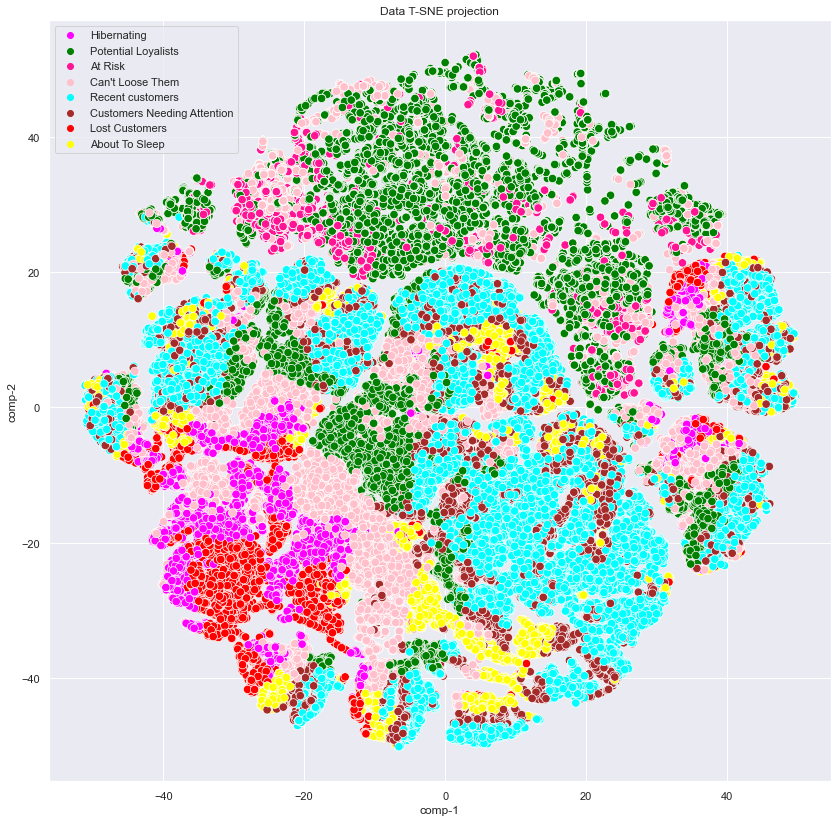

In [175]:
plt.subplots(figsize=(14, 14))
sns.scatterplot(x="comp-1", y="comp-2", hue=new_df_for_TSNE_all_data.y.tolist(), s = 70,
                palette=my_pal,
                # palette=sns.color_palette("hls", 3),
                data=new_df_for_TSNE_all_data).set(title="Data T-SNE projection")

## Segmentation maintenance analysis

Now that we have associated the labels created by K-means to the clients segments, we will try to determine the dynamics of the clients segmentation in time. For this we will merge the dataframe used in K-means analysis that contains the labels asigned to each cluster, with the dataframe created for the analysis of order placement afluence.

In [148]:
df_merge_segmentation_stability_analysis = new_df_k_means_reduced_PCA.copy()

df_merge_segmentation_stability_analysis = df_merge_segmentation_stability_analysis.merge(df_subset_for_purchase_dates, on='customer_unique_id', how='left') 

In [149]:
df_merge_segmentation_stability_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149820 entries, 0 to 149819
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_unique_id        149820 non-null  object        
 1   Segment_k_means_label     149820 non-null  int32         
 2   order_id                  149820 non-null  object        
 3   order_purchase_timestamp  149820 non-null  datetime64[ns]
 4   purchase_month            149820 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 6.3+ MB


In [150]:
df_merge_segmentation_stability_analysis['Segment_client_k_means'] = \
    df_merge_segmentation_stability_analysis['Segment_k_means_label'].map({
        0: 'Top customer: Potential Loyalists', # High recency and high monetary value. Recent customers.
        4: 'High value customer: Customers Needing Attention', # High recency and high monetary value. May not have placed purchase very recently.
        3: 'Medium value customer: Recent customers', # Highest recency
        2: 'Low-value customer: About To Sleep, Can\'t Loose Them', # Not so high recency. Haven't returned for a while.
        1: 'Lost customer: Lost Customers, Hibernating' # Low Recency and low monetary value
        })

In [151]:
df_merge_segmentation_stability_analysis.head(10)

customer_unique_id  Segment_k_means_label  \
0  598ffe324e745b97fd07d03416c49d16                      3   
1  17e5182d5817ab03fa16ee8e960e1b87                      3   
2  acea13a79aeaf715ba68122e9deb330a                      3   
3  acea13a79aeaf715ba68122e9deb330a                      3   
4  acea13a79aeaf715ba68122e9deb330a                      3   
5  acea13a79aeaf715ba68122e9deb330a                      3   
6  acea13a79aeaf715ba68122e9deb330a                      3   
7  acea13a79aeaf715ba68122e9deb330a                      3   
8  acea13a79aeaf715ba68122e9deb330a                      3   
9  acea13a79aeaf715ba68122e9deb330a                      3   

                           order_id order_purchase_timestamp purchase_month  \
0  3f13c6c8bb6e531e041cc02ecda5880b               2018-06-13           June   
1  321306819534558dae9c3a1a551e91c7               2017-08-28         August   
2  55a90b35362150673d3546509274be53               2018-08-13         August   
3  bcbc83ec3dc71750aff96a593b9e280f               2018-06-06           June   
4  55a90b35362150673d3546509274be53               2018-08-13         August   
5  bcbc83ec3dc71750aff96a593b9e280f               2018-06-06           June   
6  55a90b35362150673d3546509274be53               2018-08-13         August   
7  bcbc83ec3dc71750aff96a593b9e280f               2018-06-06           June   
8  55a90b35362150673d3546509274be53               2018-08-13         August   
9  bcbc83ec3dc71750aff96a593b9e280f               2018-06-06           June   

                    Segment_client_k_means  
0  Medium value customer: Recent customers  
1  Medium value customer: Recent customers  
2  Medium value customer: Recent customers  
3  Medium value customer: Recent customers  
4  Medium value customer: Recent customers  
5  Medium value customer: Recent customers  
6  Medium value customer: Recent customers  
7  Medium value customer: Recent customers  
8  Medium value customer: Recent customers  
9  Medium value customer: Recent customers

Now we will define a period of time equal to one year. We will use the data from September 2017 to September 2018. 

As we will use the data for the period from September 2017 to September 2018, we will see how many clients belong to each customer segment in each year season, this is:

* September, 2017 - November, 2017 --> Fall season
* December, 2017 - February, 2018 --> Winter season
* March, 2018 - May, 2018 --> Spring season
* June, 2018 - August, 2018 --> Summer season

In [152]:
def create_season_dataframe(df_season, season_start_date, season_end_date):

    mask = (df_season['order_purchase_timestamp'] >= season_start_date) & (df_season['order_purchase_timestamp'] <= season_end_date)

    df_season = df_season.loc[mask]

    df_season['order_purchase_timestamp'] = pd.to_datetime(df_season['order_purchase_timestamp']).dt.date

    df_season_stats = pd.DataFrame(df_season.groupby('Segment_client_k_means', as_index= False).agg({'customer_unique_id': np.size}))

    return df_season_stats

### Fall season dataframe

Next, we will see the stats for the customers segments along the season of the year period.

In [153]:
df_fall_season = df_merge_segmentation_stability_analysis.copy()
df_fall_season_stats = create_season_dataframe(df_fall_season, '2017-09-01', '2017-11-01')
df_fall_season_stats.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Segment_client_k_means  customer_unique_id
0   High value customer: Customers Needing Attention                1398
1         Lost customer: Lost Customers, Hibernating                5560
2  Low-value customer: About To Sleep, Can't Loos...                5696
3            Medium value customer: Recent customers                2586
4                  Top customer: Potential Loyalists                 226

### Winter season dataframe

In [154]:
df_winter_season = df_merge_segmentation_stability_analysis.copy()
df_winter_season_stats = create_season_dataframe(df_winter_season, '2017-12-01', '2018-02-01')
df_winter_season_stats.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Segment_client_k_means  customer_unique_id
0   High value customer: Customers Needing Attention                1987
1         Lost customer: Lost Customers, Hibernating                7100
2  Low-value customer: About To Sleep, Can't Loos...                6869
3            Medium value customer: Recent customers                4434
4                  Top customer: Potential Loyalists                 278

### Spring season dataframe

In [155]:
df_spring_season = df_merge_segmentation_stability_analysis.copy()
df_spring_season_stats = create_season_dataframe(df_spring_season, '2018-03-01', '2018-05-01')
df_spring_season_stats.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Segment_client_k_means  customer_unique_id
0   High value customer: Customers Needing Attention                2872
1         Lost customer: Lost Customers, Hibernating                6566
2  Low-value customer: About To Sleep, Can't Loos...                6655
3            Medium value customer: Recent customers                3038
4                  Top customer: Potential Loyalists                1245

### Summer season dataframe

In [156]:
df_summer_season = df_merge_segmentation_stability_analysis.copy()
df_summer_season_stats = create_season_dataframe(df_spring_season, '2018-06-01', '2018-08-01')
df_summer_season_stats.head()

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Segment_client_k_means  customer_unique_id
0   High value customer: Customers Needing Attention                1257
1         Lost customer: Lost Customers, Hibernating                1653
2  Low-value customer: About To Sleep, Can't Loos...                1286
3            Medium value customer: Recent customers                2108
4                  Top customer: Potential Loyalists               11098

### Clients segmentation evolution in time

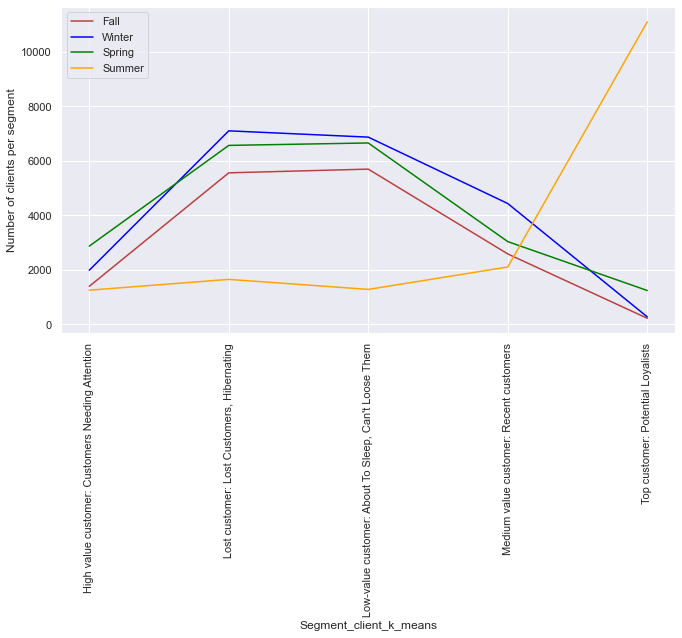

In [157]:
order_ticks = ["Top customer: Potential Loyalists",
                "High value customer: Customers Needing Attention",
                "Medium value customer: Recent customers",
                "Low-value customer: About To Sleep, Can\'t Loose Them"
                "Lost customer: Lost Customers, Hibernating"]

sns.lineplot(data=df_fall_season_stats, x="Segment_client_k_means", y="customer_unique_id", markers='o', color="#bb3f3f", label='Fall')
sns.lineplot(data=df_winter_season_stats, x="Segment_client_k_means", y="customer_unique_id", markers='x', color="blue", label='Winter')
sns.lineplot(data=df_spring_season_stats, x="Segment_client_k_means", y="customer_unique_id", markers='+', color="green", label='Spring')
sns.lineplot(data=df_summer_season_stats, x="Segment_client_k_means", y="customer_unique_id", markers='*', color="orange", label='Summer')

plt.xticks(rotation=90)
plt.ylabel('Number of clients per segment')
plt.legend()

As observed, there is a change in the number of clients belonging to each segment for each season of the year. An interesting observation is that in the Fall of 2017 (end of year), there are no Lost customers observed and there are a lot of Medium value and Top customers registered. Then in the Winter of 2018, Lost customers start to appear, increasing their number by Spring of 2018 and Summer of 2018.